In [1]:
# Import all the tools we need

# Regular EDA(Explratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import itertools
import re

# Models from Scikit-learn
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Model evaluations
from sklearn import metrics

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt

In [2]:
tweets=pd.read_csv('Tweets.csv')
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
tweets.shape

(14640, 15)

In [4]:
## For better accuracy removiing the data with low confiddence (50%)

tweets_df=tweets.drop(tweets[tweets['airline_sentiment_confidence']<0.5].index,axis=0)
tweets_df.shape

(14404, 15)

In [5]:
X=tweets_df['text']
y=tweets_df['airline_sentiment']

In [6]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(X)):
    review = re.sub("^a-zA-Z", " ", X.iloc[i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)

In [7]:
corpus

['@virginamerica @dhepburn said.',
 '@virginamerica today... must mean need take anoth trip!',
 '@virginamerica realli aggress blast obnoxi "entertainment" guests\' face &amp; littl recours',
 '@virginamerica realli big bad thing',
 '@virginamerica serious would pay $30 flight seat playing. realli bad thing fli va',
 '@virginamerica yes, nearli everi time fli vx “ear worm” won’t go away :)',
 '@virginamerica realli miss prime opportun men without hat parody, there. https://t.co/mwpg7grezp',
 "@virginamerica well, didn't…but do! :-d",
 '@virginamerica amazing, arriv hour early. good me.',
 '@virginamerica know suicid second lead caus death among teen 10-24',
 '@virginamerica &lt;3 pretti graphics. much better minim iconography. :d',
 '@virginamerica great deal! alreadi think 2nd trip @australia &amp; even gone 1st trip yet! ;p',
 "@virginamerica @virginmedia i'm fli #fabul #seduct sky again! u take #stress away travel http://t.co/ahlxhhkiyn",
 '@virginamerica thanks!',
 '@virginamerica 

In [8]:
cv = CountVectorizer(max_features=5000, stop_words=['virginamerica','unit'])
X=cv.fit_transform(corpus).toarray()

In [9]:
sentiment_ordering = ['negative', 'neutral', 'positive']
y = y.apply(lambda x: sentiment_ordering.index(x))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
cv.get_feature_names()[:20]

['00',
 '000',
 '0016',
 '00pm',
 '02',
 '03',
 '05',
 '05am',
 '05pm',
 '08',
 '10',
 '100',
 '1000',
 '1007',
 '1027',
 '1051',
 '1080',
 '1081',
 '1098',
 '1099']

In [12]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,00,000,0016,00pm,02,03,05,05am,05pm,08,...,youth,yr,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y

0        1
2        1
3        0
4        0
5        0
        ..
14634    0
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14404, dtype: int64

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## MultinomialNB Algorithm

In [15]:
classifier = MultinomialNB()


Accuracy: 0.778
Confusion matrix, without normalization


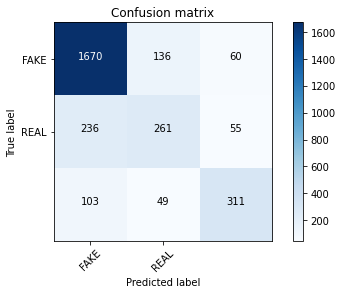

In [16]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print("Accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["FAKE", "REAL"])

## Passive Aggresive classifier Algorithm

In [17]:
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

Accuracy: 0.723
Confusion matrix, without normalization


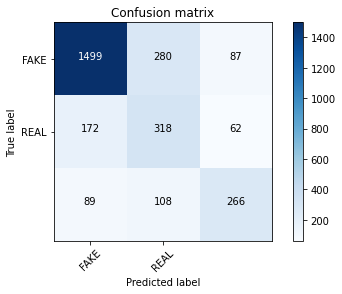

In [18]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print("Accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["FAKE", "REAL"])

## Multinomial Classfier with hyperparameter

In [19]:
classifier = MultinomialNB(alpha=0.1)

In [20]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)

    if score>previous_score:
        classifier = sub_classifier
        previous_score = score
    
    print("Alpha: {}, Score: {}".format(alpha,score))

C:\Users\jacob\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score: 0.7434918431100312
Alpha: 0.1, Score: 0.7698715723707046
Alpha: 0.2, Score: 0.7743838944810829
Alpha: 0.30000000000000004, Score: 0.7750780978826797
Alpha: 0.4, Score: 0.7768136063866713
Alpha: 0.5, Score: 0.777507809788268
Alpha: 0.6000000000000001, Score: 0.777507809788268
Alpha: 0.7000000000000001, Score: 0.779590419993058
Alpha: 0.8, Score: 0.7799375216938563
Alpha: 0.9, Score: 0.7788962165914612


Accuracy: 0.723
Confusion matrix, without normalization


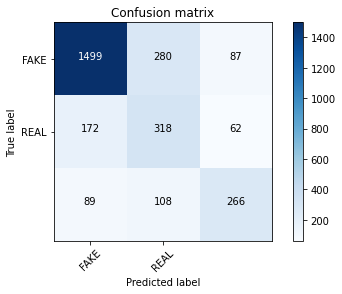

In [21]:
classifier = MultinomialNB(alpha=0.8)
classifier.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)

print("Accuracy: %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["FAKE", "REAL"])

In [22]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import classification_report
cf=classification_report(y_test,y_pred)
print(cf)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1866
           1       0.59      0.49      0.53       552
           2       0.72      0.68      0.70       463

    accuracy                           0.78      2881
   macro avg       0.72      0.69      0.70      2881
weighted avg       0.77      0.78      0.77      2881

